Первый слой сети, который смотрит на изображения, зависит от цветов. Если изображение цветное, он смотрит на три цвета: красный, зеленый и синий. Если черно-белое - только на один цвет.

Последний слой сети, который решает, к какому классу относится изображение, зависит от классов. Если имеется 100 классов, то в этом слое 100 “детекторов”, каждый из которых ищет свой класс. Если классов 20, то детекторов тоже 20.

In [29]:
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Слои свертки (Conv2D): Эти слои анализируют изображение и выделяют небольшие фрагменты. Количество фильтров в слое свертки - количество уникальных признаков, чем их больше - тем лучше

Слои подвыборки (MaxPooling2D): Эти слои сжимают данные, оставляя лишь важные признаки. Это позволяет уменьшить объем данных и избежать переобучения модели.

Полносвязные слои (Dense): Эти слои классифицируют изображения на основе признаков, извлеченных слоями свертки и подвыборки. Первый полносвязный слой имеет 64 нейрона, а выходной слой имеет столько нейронов, сколько классов в задаче (100 или 20).

Выбор гиперпараметров обычно основывается на опыте и экспериментах. В данном случае были выбраны 3 слоя свертки с 32 и 64 фильтрами, что является стандартной практикой для небольших изображений, таких как CIFAR (https://github.com/BillyBSig/CIFAR-100-TFDS/blob/main/CIFAR_100_TFDS_.ipynb). Также были использованы слои MaxPooling после каждого слоя свертки для уменьшения размерности. Были выбраны 64 нейрона для первого полносвязного слоя, что является достаточным для этой задачи. Наконец, была использована функция активации ReLU и оптимизатор Adam, которые являются стандартными выборами для таких задач. Количество эпох (10) было выбрано для баланса между временем обучения и производительностью модели.

In [23]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='fine')
train_images, test_images = train_images / 255.0, test_images / 255.0
model_100 = models.Sequential()
model_100.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_100.add(layers.MaxPooling2D((2, 2)))
model_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100.add(layers.MaxPooling2D((2, 2)))
model_100.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_100.add(layers.Flatten())
model_100.add(layers.Dense(64, activation='relu'))
model_100.add(layers.Dense(100)) 
model_100.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_100 = model_100.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 4.0114 - accuracy: 0.0836 - val_loss: 3.6056 - val_accuracy: 0.1505
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 3.3326 - accuracy: 0.1962 - val_loss: 3.1979 - val_accuracy: 0.2265
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 3.0320 - accuracy: 0.2508 - val_loss: 3.0162 - val_accuracy: 0.2577
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.8451 - accuracy: 0.2874 - val_loss: 2.8952 - val_accuracy: 0.2915
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.7051 - accuracy: 0.3143 - val_loss: 2.7603 - val_accuracy: 0.3110
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5931 - accuracy: 0.3367 - val_loss: 2.6997 - val_accuracy: 0.3224
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.5117 - accuracy: 0.3565 - val_loss: 2.6793 -

In [24]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')
train_images, test_images = train_images / 255.0, test_images / 255.0
model_20 = models.Sequential()
model_20.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_20.add(layers.MaxPooling2D((2, 2)))
model_20.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_20.add(layers.MaxPooling2D((2, 2)))
model_20.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_20.add(layers.Flatten())
model_20.add(layers.Dense(64, activation='relu'))
model_20.add(layers.Dense(20))
model_20.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history_20 = model_20.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.4553 - accuracy: 0.2388 - val_loss: 2.2399 - val_accuracy: 0.3077
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0783 - accuracy: 0.3560 - val_loss: 2.0608 - val_accuracy: 0.3610
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9017 - accuracy: 0.4096 - val_loss: 1.9472 - val_accuracy: 0.4017
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7759 - accuracy: 0.4464 - val_loss: 1.8397 - val_accuracy: 0.4329
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6921 - accuracy: 0.4697 - val_loss: 1.7667 - val_accuracy: 0.4547
Epoch 6/10
1563/1563 [==============================] - 16s 11ms/step - loss: 1.6094 - accuracy: 0.4956 - val_loss: 1.7355 - val_accuracy: 0.4648
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5451 - accuracy: 0.5164 - val_loss: 1.7042 -

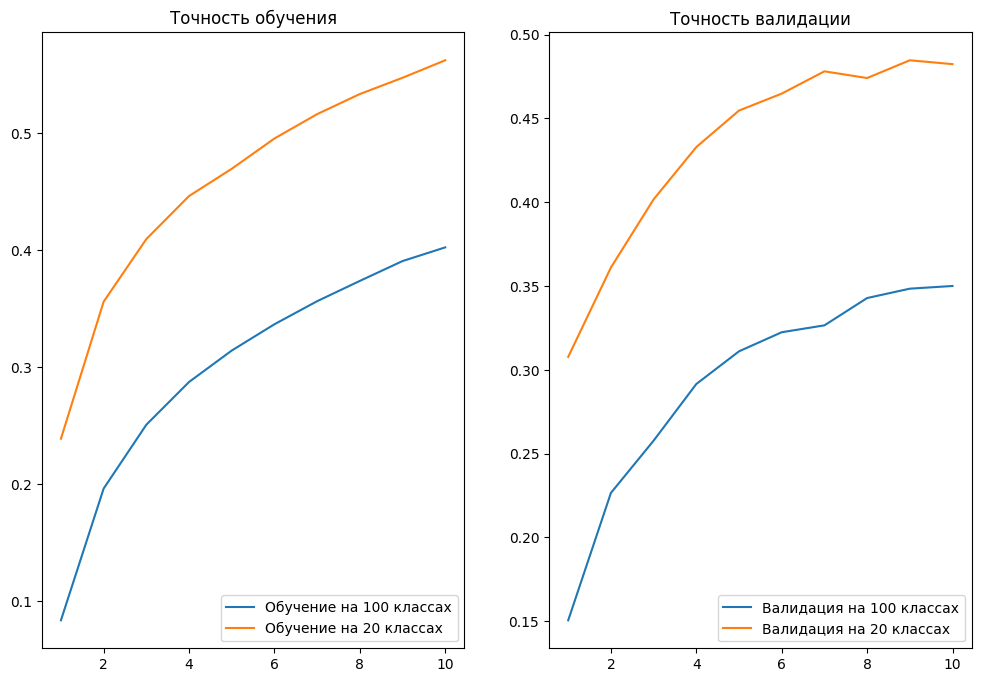

In [25]:
acc_100 = history_100.history['accuracy']
val_acc_100 = history_100.history['val_accuracy']
acc_20 = history_20.history['accuracy']
val_acc_20 = history_20.history['val_accuracy']
epochs_range = range(1, len(acc_100) + 1)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_100, label='Обучение на 100 классах')
plt.plot(epochs_range, acc_20, label='Обучение на 20 классах')
plt.legend(loc='lower right')
plt.title('Точность обучения')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_acc_100, label='Валидация на 100 классах')
plt.plot(epochs_range, val_acc_20, label='Валидация на 20 классах')
plt.legend(loc='lower right')
plt.title('Точность валидации')
plt.show()


In [31]:
y_pred_100 = model_100.predict(test_images)
y_pred_labels_100 = np.argmax(y_pred_100, axis=1)
report_100 = classification_report(test_labels, y_pred_labels_100)
print("Отчет о классификации для 100 классов:\n", report_100)


313/313 [==============================] - 1s 4ms/step
Отчет о классификации для 100 классов:
               precision    recall  f1-score   support

           0       0.01      0.00      0.00       500
           1       0.39      0.13      0.20       500
           2       0.01      0.00      0.01       500
           3       0.00      0.00      0.00       500
           4       0.00      0.00      0.00       500
           5       0.01      0.00      0.00       500
           6       0.01      0.00      0.00       500
           7       0.50      0.13      0.20       500
           8       0.07      0.01      0.02       500
           9       0.03      0.01      0.01       500
          10       0.00      0.00      0.00       500
          11       0.05      0.00      0.00       500
          12       0.01      0.00      0.00       500
          13       0.04      0.01      0.02       500
          14       0.03      0.01      0.01       500
          15       0.04      0.01      0

c:\Users\wildFLEXXX\Desktop\final-exam\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wildFLEXXX\Desktop\final-exam\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wildFLEXXX\Desktop\final-exam\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
y_pred_20 = model_20.predict(test_images)
y_pred_labels_20 = np.argmax(y_pred_20, axis=1)
report_20 = classification_report(test_labels, y_pred_labels_20)
print("Отчет о классификации для 20 классов:\n", report_20)

313/313 [==============================] - 1s 4ms/step
Отчет о классификации для 20 классов:
               precision    recall  f1-score   support

           0       0.41      0.41      0.41       500
           1       0.54      0.41      0.47       500
           2       0.66      0.71      0.68       500
           3       0.58      0.37      0.45       500
           4       0.58      0.58      0.58       500
           5       0.37      0.37      0.37       500
           6       0.57      0.55      0.56       500
           7       0.48      0.47      0.48       500
           8       0.42      0.39      0.40       500
           9       0.59      0.59      0.59       500
          10       0.68      0.68      0.68       500
          11       0.40      0.41      0.41       500
          12       0.41      0.36      0.38       500
          13       0.28      0.30      0.29       500
          14       0.47      0.64      0.54       500
          15       0.26      0.35      0.

Согласно метрикам, модель, обученная на 20 классах значительно превосходит модель, обученную на 100 классах. На мой взгляд, это может быть связано с тем, что либо этой модели было недостаточно времени для обучения, либо недостаточно данных.

In [ ]:
model_100.save('100.keras')
model_20.save('20.keras')